# Interpretazione della probabilità {#sec-intro-prob}

**Prerequisiti**

- Leggi @sec-set-theory.

**Concetti e competenze chiave**

- Comprendere le diverse interpretazioni della probabilità.
- Conoscere e saper applicare i concetti di spazio campionario ed evento.
- Interpretare gli assiomi della probabilità.
- Avere una chiara comprensione della legge dei grandi numeri.
- Calcolare la probabilità tramite simulazione.
- Applicare la legge dei grandi numeri tramite simulazione.
- Calcolare le permutazioni e le combinazioni.

**Preparazione del Notebook**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import itertools as it
import math
import random
import scipy.stats as stats
import arviz as az
import seaborn as sns
from collections import Counter

In [3]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "intro_prob"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

Nel corso di questo capitolo, esploreremo varie concezioni della probabilità, tra cui la visione classica, frequentista e bayesiana. Inoltre, introdurremo la simulazione con Python per una migliore comprensione della legge dei grandi numeri, un concetto fondamentale nell'ambito della probabilità.

## Storia e definizioni della probabilità

La probabilità è un modo formale di quantificare l'incertezza, assegnando plausibilità o credibilità a un insieme di possibilità mutuamente esclusive o risultati di un esperimento o osservazione.

### Che cos'è la probabilità?
Ci sono due modi principali per interpretare la probabilità:

- **Frequentista**: Secondo il framework frequentista, la probabilità rappresenta il limite della frequenza relativa con cui un evento di interesse si verifica quando il numero di esperimenti condotti ripetutamente nelle stesse condizioni tende all'infinito. In questa visione, chiamata "ontologica", la probabilità è considerata una proprietà intrinseca del mondo, indipendente dalla nostra esperienza. La probabilità è quindi vista come una caratteristica oggettiva della realtà.
- **Bayesiana**: Al contrario, il framework bayesiano interpreta la probabilità come una credenza soggettiva riguardo alla probabilità di accadimento di un evento. In questa prospettiva "epistemica", la probabilità è una misura della nostra conoscenza del mondo piuttosto che una proprietà oggettiva. Questa visione soggettiva della probabilità dipende dalle informazioni disponibili e dal punto di vista dell'osservatore.

### Storia della probabilità
La storia della probabilità è lunga e complessa, come illustrato in varie opere (Tabak 2004, Stigler 1986, Weisberg 2014). L'origine della probabilità moderna risale a una domanda posta da Antoine Gombaud (Chevalier de Méré) a Blaise Pascal (1623–1662) su come dividere equamente le puntate di un gioco di carte interrotto. 

#### Problema dei punti

Il problema può essere formulato così:

> Immaginiamo due persone che partecipano a un gioco a più round. In ogni round, entrambe le persone hanno la stessa probabilità di vincere. La prima persona che vince sei round consecutivi si aggiudicherà un ricco premio in denaro. Supponiamo che A e B abbiano già disputato sei round, con A che ha vinto cinque volte e B una volta. In quel momento, il gioco è interrotto. Poiché né A né B hanno raggiunto le sei vittorie, hanno deciso di dividere il premio. Ma qual è il modo più equo per farlo?

La discussione tra Pierre de Fermat (1607–1665) e Pascal ha portato alla formalizzazione dell'utilizzo della matematica per risolvere questo problema, proponendo di considerare le probabilità di vincita di ciascun giocatore. Ad esempio, se A ha una probabilità del 97% di vincere il premio e B ha una probabilità del 3%, sembrerebbe equo assegnare ad A il 97% del premio. L'interesse pubblico per la loro corrispondenza è sopravvissuto grazie al libro di Christian Huygens del 1657 "De Ratiociniis in Ludo Aleae" (Sul Ragionamento nei Giochi di Dadi), che è rimasto il riferimento per la probabilità per circa 50 anni.

#### Sviluppi successivi
Il libro postumo di Jacob Bernoulli, "L'Arte della Congettura" (1713), ha segnato una svolta nella storia della probabilità. Bernoulli ha definito la probabilità come un indice di incertezza compreso tra 0 e 1 e ha collegato il calcolo della probabilità ai dati e alla frequenza a lungo termine di un evento, noto come legge dei grandi numeri. Bernoulli ha applicato la probabilità anche a settori diversi dal gioco d'azzardo, come la mortalità umana e la giustizia penale, creando la cosiddetta "probabilità soggettiva".

### Interpretazione "classica"
Storicamente, la prima definizione di probabilità è stata proposta da Pierre-Simon Laplace (1749-1827), che si è avvalso del calcolo combinatorio. Secondo Laplace, la probabilità$P$di un evento è definita come il rapporto tra il numero di casi in cui l'evento si verifica e il numero totale di casi possibili. In questa definizione, un evento è qualcosa a cui è possibile assegnare un valore di verità, ovvero qualcosa che può essere vero o falso. Ad esempio, la probabilità di ottenere un 3 in un lancio di un singolo dado è 1/6 ≃ 0.17, poiché c'è un solo caso favorevole (il lancio ha prodotto un 3) su sei casi possibili (i numeri da 1 a 6). Tuttavia, questa definizione è insoddisfacente in quanto si basa sull'assunzione che ogni evento sia equiprobabile, il che non è sempre vero. Inoltre, questa definizione è circolare poiché per definire il concetto di probabilità, è necessario prima definire cosa significa che gli eventi siano equiprobabili, e quindi si deve già conoscere il concetto di probabilità.

### Interpretazione frequentista
Un secondo tentativo di definire la probabilità (dopo quello "classico" di Laplace) si basa sull'approccio frequentista, che può essere attribuito a molti autori. In questo approccio, la probabilità è definita sulla base delle frequenze osservate dell'occorrenza di un evento. Questo approccio nasce dalla difficoltà di assegnare una probabilità agli eventi assumendo il principio di equiprobabilità, come nel caso delle monete, dei dadi o delle carte di un mazzo. Sebbene la probabilità di ottenere testa come risultato del lancio di un dado sia 1/2 se crediamo che la moneta sia bilanciata, se così non fosse non potremmo assegnare la stessa probabilità a tutti i risultati possibili. Tuttavia, possiamo stimare le probabilità come la frequenza$f_t$, definita come il rapporto tra il numero di volte in cui un lancio ha prodotto "testa" e il numero totale di lanci.

Si osservi che l'osservazione della frequenza $f_t$ è solo un' approssimazione della probabilità, ma l'accuratezza migliora all'aumentare del numero totale di lanci, $N$. In linea di principio, la probabilità di ottenere "testa", $P(T)$, è il limite della frequenza $f_t$ quando il numero totale di lanci $N$ tende all'infinito. Tuttavia, questa definizione richiede l'infinita ripetizione di un esperimento, il che può essere impraticabile o impossibile in molti casi. Inoltre, questa definizione assume che gli eventi futuri siano simili agli eventi passati, il che non è sempre garantito.

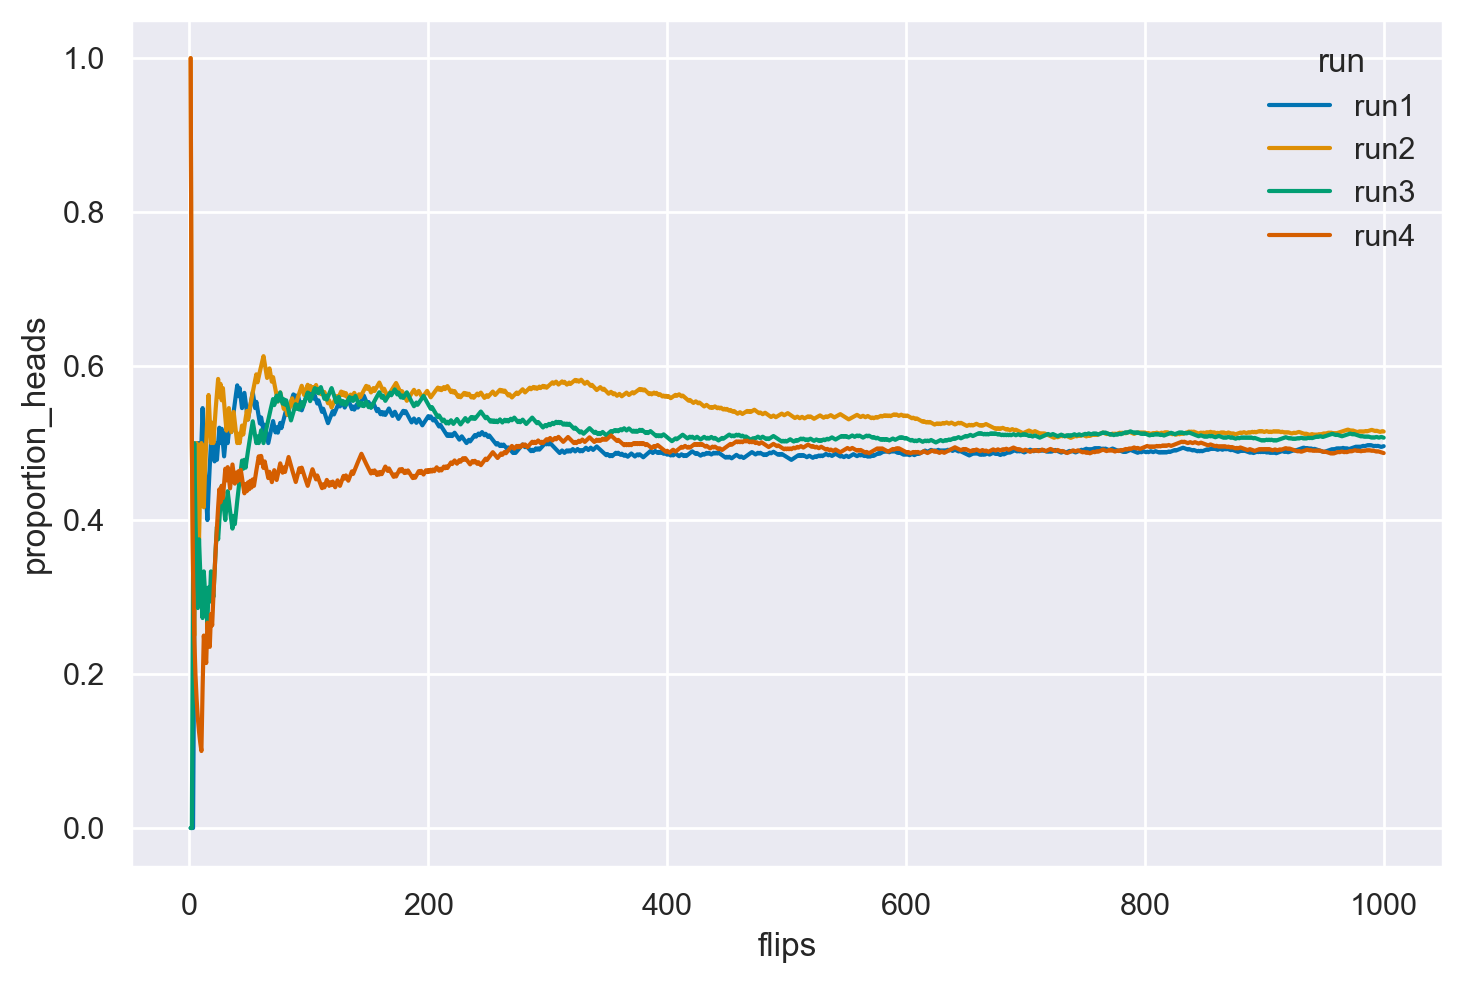

In [3]:
def coin_flips(n, run_label):
    # Genera un array di 0 e 1 dove 1 rappresenta 'testa' e 0 'croce'
    # usando una distribuzione binomiale.
    heads = np.random.binomial(1, 0.5, n)
    
    # Calcola la proporzione cumulativa di teste.
    flips = np.arange(1, n + 1) 
    proportion_heads = np.cumsum(heads) / flips
    
    # Crea un DataFrame per un facile accesso e visualizzazione dei dati.
    df = pd.DataFrame({'flips': flips, 'proportion_heads': proportion_heads, 'run': run_label})

    return df

n = 1000

df = pd.concat([coin_flips(n, f'run{i+1}') for i in range(4)], axis=0)
ax = sns.lineplot(data = df, x = 'flips', y = 'proportion_heads', hue = 'run')

### La Legge dei Grandi Numeri

La simulazione precedente fornisce un esempio della Legge dei grandi numeri. La Legge dei Grandi Numeri afferma che, man mano che il numero di esperimenti casuali ripetuti aumenta, la stima della probabilità di un evento $P(Y=y)$ diventa sempre più accurata.

Il teorema sostiene che, con l'aumento del numero di ripetizioni di un esperimento casuale, la media dei risultati osservati tende a convergere al valore atteso teorico della variabile casuale. In altre parole, la media empirica dei risultati osservati si avvicina sempre di più al valore medio teorico.

Questa legge è cruciale perché garantisce che, con un numero sufficientemente grande di prove, la stima empirica della probabilità di un evento si avvicina al valore reale. Questo rende le stime probabilistiche più precise e affidabili.

Dal punto di vista pratico, la Legge dei Grandi Numeri consente di utilizzare modelli probabilistici per interpretare fenomeni reali. Anche se le osservazioni singole possono variare in modo casuale, la media delle osservazioni su un ampio numero di ripetizioni rifletterà fedelmente le probabilità teoriche.

Formalmente, data una serie di variabili casuali indipendenti $X_1, X_2, \ldots, X_n$, ciascuna con media $\mu$, la Legge dei Grandi Numeri è espressa come:

$$
\lim_{{n \to \infty}} P\left(\left|\frac{X_1 + X_2 + \ldots + X_n}{n} - \mu\right| < \epsilon\right) = 1,
$$

dove $\epsilon$ è un valore positivo arbitrariamente piccolo e $P(\cdot)$ indica la probabilità. Questo significa che, con un numero molto grande di ripetizioni, la media campionaria osservata sarà vicina alla media teorica attesa, permettendo inferenze affidabili sulla probabilità degli eventi.

In sintesi, la Legge dei Grandi Numeri assicura che, aumentando il numero di prove, le stime empiriche delle probabilità diventano sempre più precise, allineandosi con i valori teorici attesi.

#### Problema del caso singolo

Nell'ambito dell'approccio frequentista alla probabilità, basato sulla concezione delle frequenze relative di eventi osservati su lunghe serie di ripetizioni, emerge un limite concettuale nel trattare la probabilità di eventi singolari e non ripetibili. Secondo questa prospettiva, infatti, non risulta rigorosamente appropriato discutere di probabilità relative a eventi unici e non replicabili nel tempo. Esempi emblematici di tali eventi includono la possibilità che Alcaraz vinca contro Djokovic nella finale di Wimbledon del 2023 o che si verifichi pioggia a Firenze il giorno di Ferragosto del 2024. Questi scenari, essendo unici e circoscritti a un preciso momento storico, sfuggono alla logica frequentista che richiede, per definizione, la possibilità di osservazione ripetuta degli eventi per valutarne la probabilità. Nonostante ciò, nel linguaggio comune non specialistico, è comune l'uso del termine "probabilità" per riferirsi anche a tali eventi specifici e non ripetibili, evidenziando così una discrepanza tra l'uso tecnico e quello colloquiale del concetto di probabilità.

### Collegamento tra probabilità e statistica

Durante gli anni '20 del Novecento, Ronald A. Fisher propose un nuovo framework teorico per l'inferenza statistica, basato sulla concettualizzazione della frequenza. Fisher introdusse concetti chiave come la massima verosimiglianza, i test di significatività, i metodi di campionamento, l'analisi della varianza e il disegno sperimentale.

Negli anni '30, Jerzy Neyman ed Egon Pearson fecero ulteriori progressi nel campo con lo sviluppo di una teoria della decisione statistica, basata sul principio della verosimiglianza e sull'interpretazione frequentista della probabilità. Definirono due tipologie di errori decisionali e utilizzarono il test di significatività di Fisher, interpretando i valori$p$come indicatori dei tassi di errore a lungo termine.

### La riscoperta dei metodi Monte Carlo Markov chain

Fisher assunse una prospettiva critica nei confronti della "probabilità inversa" (ossia, i metodi bayesiani), nonostante questa fosse stata la metodologia predominante per l'inferenza statistica per quasi un secolo e mezzo. Il suo approccio frequentista ebbe un profondo impatto sullo sviluppo della statistica sia teorica che sperimentale, contribuendo a un decremento nell'utilizzo dell'inferenza basata sul metodo della probabilità inversa, originariamente proposto da Laplace.

Nel 1939, il libro di Harold Jeffreys intitolato "Theory of Probability" rappresentò una delle prime esposizioni moderne dei metodi bayesiani. Tuttavia, la rinascita del framework bayesiano fu rinviata fino alla scoperta dei metodi Monte Carlo Markov chain alla fine degli anni '80. Questi metodi hanno reso fattibile il calcolo di risultati precedentemente non ottenibili, consentendo un rinnovato interesse e sviluppo nei metodi bayesiani. Per una storia dell'approccio bayesiano, si veda [Bayesian Methods: General Background](https://bayes.wustl.edu/etj/articles/general.background.pdf) oppure [Philosophy of Statistics](https://plato.stanford.edu/entries/statistics/).

### Interpretazione soggettivista

Una visione alternativa della probabilità la considera come una credenza soggettiva. @de2017theory ha proposto un'interpretazione in cui la probabilità non è vista come una caratteristica oggettiva degli eventi, ma piuttosto come una misura della credenza soggettiva, suggerendo di trattare $p(·)$ come una probabilità soggettiva. È interessante notare che de Finetti era un soggettivista radicale. Infatti, la frase di apertura del suo trattato in due volumi sulla probabilità afferma che "La probabilità non esiste", intendendo che la probabilità non ha uno status oggettivo, ma rappresenta piuttosto la quantificazione della nostra esperienza di incertezza. Riteneva che l'idea di una probabilità esterna all'individuo, con uno status oggettivo, fosse pura superstizione, paragonabile al credere in "Etere cosmico, Spazio e Tempo assoluti, ..., o Fate e Streghe...". Secondo de Finetti, "... esistono solo probabilità soggettive - cioè, il grado di credenza nell'occorrenza di un evento attribuito da una determinata persona in un dato momento con un dato insieme di informazioni."

Come sottolineato da @press2009subjective, la prima menzione della probabilità come grado di credenza soggettiva fu fatta da @ramsey1926truth, ed è questa nozione di probabilità come credenza soggettiva che ha portato a una notevole resistenza alle idee bayesiane. Una trattazione dettagliata degli assiomi della probabilità soggettiva si trova in @fishburn1986axioms.

La denominazione "soggettivo" legata alla probabilità potrebbe risultare infelice, poiché potrebbe suggerire un ragionamento vago o non scientifico. @lindley2013understanding condivide queste riserve, proponendo l'alternativa "probabilità personale" rispetto a "probabilità soggettiva". Analogamente, @howson2006scientific preferiscono utilizzare l'espressione "probabilità epistemica", che riflette il grado di incertezza di un individuo di fronte al problema trattato. In sostanza, la probabilità epistemica si riferisce all'incertezza personale riguardo a variabili sconosciute. Questa terminologia viene adottata anche nel testo di @kaplan2023bayesian, fornendo un linguaggio più neutro per discutere di questi concetti.

Va inoltre notato che l'interpretazione soggettiva si adatta bene a eventi singoli, permettendo di esprimere una convinzione su eventi specifici, come la probabilità di pioggia in un dato giorno o l'esito di una competizione sportiva.

::: {.callout-note}
Per chi desidera approfondire, il primo capitolo del testo *Bernoulli's Fallacy* [@clayton2021bernoulli] offre un'introduzione molto leggibile alle tematiche della definizione della probabilità nella storia della scienza.
:::

## Commenti e Considerazioni Finali

In questo capitolo, abbiamo esplorato il significato filosofico della nozione di probabilità e introdotto la simulazione come metodo per approssimare le probabilità empiriche quando non è possibile ottenere soluzioni analitiche.

Nel prossimo capitolo, esamineremo la probabilità dal punto di vista matematico.

## Informazioni sull'Ambiente di Sviluppo

In [9]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sat Jul 27 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

numpy     : 1.26.4
seaborn   : 0.13.2
pandas    : 2.2.2
scipy     : 1.14.0
matplotlib: 3.9.1
arviz     : 0.18.0

Watermark: 2.4.3

